# Importing necessary libraries



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###  Setting up visualizations


In [4]:
sns.set(style="whitegrid")


### Load datasets


In [5]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# EDA

### Step 1: Basic Data Understanding

In [8]:
print("Customers Dataset Info:")
print(customers.info())
print(customers.head())



Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [9]:
print("\nProducts Dataset Info:")
print(products.info())
print(products.head())



Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [10]:
print("\nTransactions Dataset Info:")
print(transactions.info())
print(transactions.head())


Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070    

### Checking for missing values

In [12]:
print("\nMissing Values in Customers Dataset:")
print(customers.isnull().sum())


Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [13]:
print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())


Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [14]:
print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())


Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Checking for duplicates

In [15]:
print("\nDuplicate Rows in Customers Dataset:", customers.duplicated().sum())
print("Duplicate Rows in Products Dataset:", products.duplicated().sum())
print("Duplicate Rows in Transactions Dataset:", transactions.duplicated().sum())


Duplicate Rows in Customers Dataset: 0
Duplicate Rows in Products Dataset: 0
Duplicate Rows in Transactions Dataset: 0


### Step 2: Summary Statistics

In [16]:
print("\nSummary Statistics for Transactions:")
print(transactions.describe())


Summary Statistics for Transactions:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [17]:
print("\nSummary Statistics for Products:")
print(products.describe(include='all'))


Summary Statistics for Products:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          NaN                    NaN      NaN  497.760000


In [18]:
print("\nSummary Statistics for Products:")
print(customers.describe(include='all'))


Summary Statistics for Products:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


### Step 3: Convert Date Columns to DateTime format


In [26]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], format='%Y-%m-%d %H:%M:%S')


In [27]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


### Step 4: Merge Datasets for Comprehensive Analysis

In [28]:
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')


In [29]:
print("\nMerged Dataset Info:")
print(merged_data.info())
print(merged_data.head())


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 109.

### Step 5: Distribution Analysis

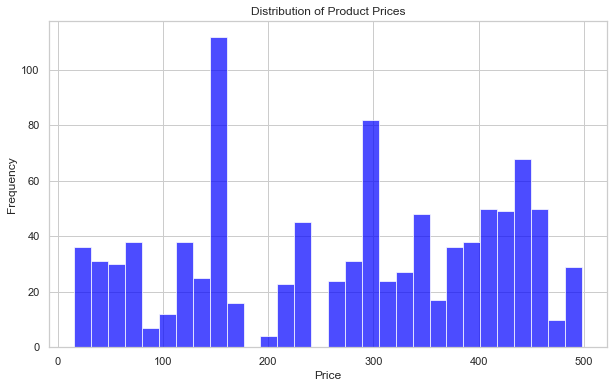

In [30]:
plt.figure(figsize=(10, 6))
merged_data['Price_x'].hist(bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Step 6: Analyze Revenue Trends

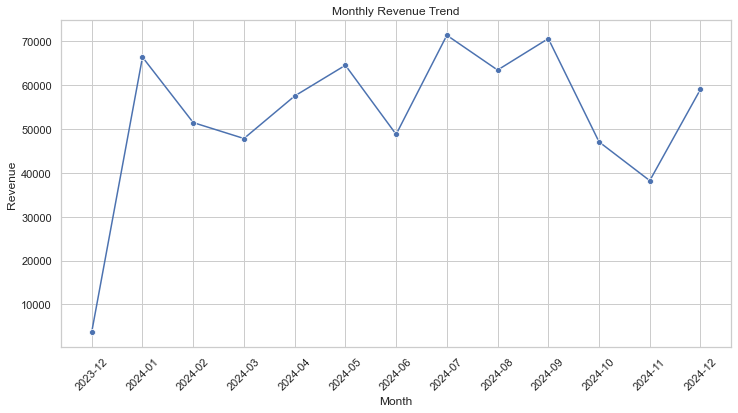

In [33]:
merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('YearMonth')['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
monthly_revenue['YearMonthStr'] = monthly_revenue['YearMonth'].astype(str)
sns.lineplot(data=monthly_revenue, x='YearMonthStr', y='TotalValue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

### Step 7: Customer Analysis

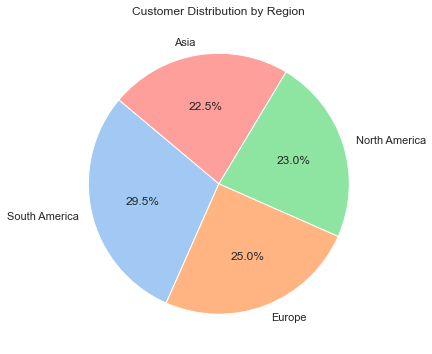

In [34]:
customers_by_region = customers['Region'].value_counts()
plt.figure(figsize=(8, 6))
customers_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Customer Distribution by Region')
plt.ylabel('')
plt.show()


### Monthly Customer Signup Frequency

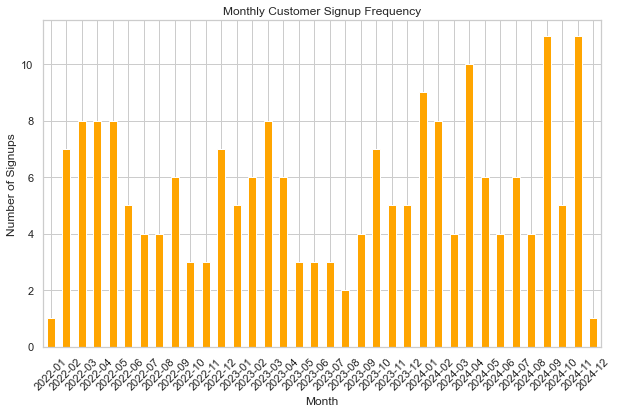


Monthly Customer Signup Frequency:
YearMonth
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: CustomerID, dtype: int64


In [42]:
customers['YearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_frequency = customers.groupby('YearMonth')['CustomerID'].count()

plt.figure(figsize=(10, 6))
signup_frequency.plot(kind='bar', color='orange')
plt.title('Monthly Customer Signup Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

print("\nMonthly Customer Signup Frequency:")
print(signup_frequency)


### Top 10 Customers by Quantity Purchased


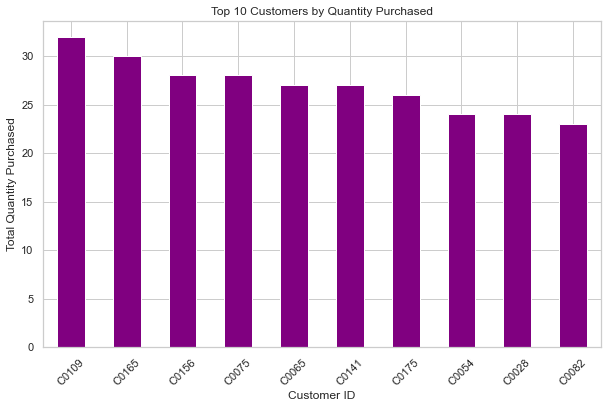


Top 10 Customers Who Bought the Most Products:
            Quantity
CustomerID          
C0109             32
C0165             30
C0156             28
C0075             28
C0065             27
C0141             27
C0175             26
C0054             24
C0028             24
C0082             23


In [43]:
top_customers = merged_data.groupby('CustomerID').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_customers['Quantity'].plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Quantity Purchased')
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.show()

print("\nTop 10 Customers Who Bought the Most Products:")
print(top_customers)


## Step 8: Product Analysis

### Top 10 Products by Revenue

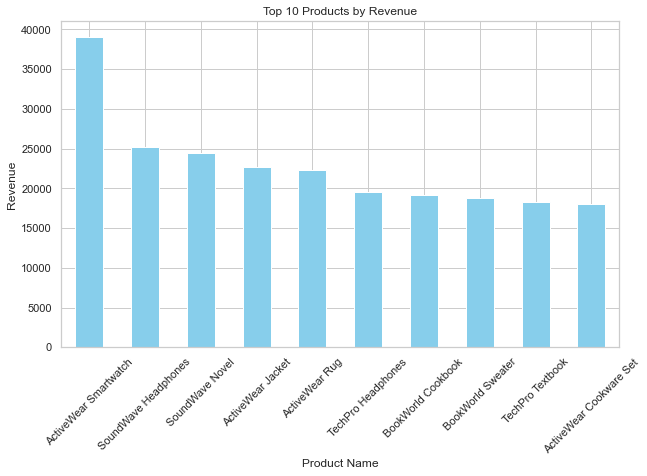

In [35]:
product_sales = merged_data.groupby('ProductName').agg({'Quantity': 'sum', 'TotalValue': 'sum'}).sort_values(by='TotalValue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
product_sales['TotalValue'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Most Purchased Categories
category_quantity = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_quantity.plot(kind='bar', color='teal')
plt.title('Most Purchased Product Categories')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

print("\nMost Purchased Product Categories:")
print(category_quantity)


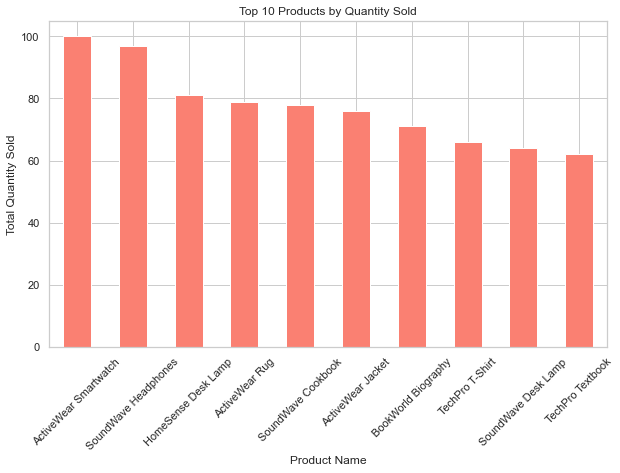


Total Quantity of Each Product Sold:
ProductName
ActiveWear Smartwatch       100
SoundWave Headphones         97
HomeSense Desk Lamp          81
ActiveWear Rug               79
SoundWave Cookbook           78
                           ... 
HomeSense Headphones         18
SoundWave Laptop             16
SoundWave Jacket             16
BookWorld Wall Art           15
ComfortLiving Headphones     15
Name: Quantity, Length: 66, dtype: int64


In [36]:
# Analyze Total Quantity of Each Product
product_quantity = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

# Plotting the Total Quantity of Top 10 Products
plt.figure(figsize=(10, 6))
product_quantity.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Products by Quantity Sold')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()

# Displaying the total quantity sold for all products
print("\nTotal Quantity of Each Product Sold:")
print(product_quantity)

### Product-wise Selling Count

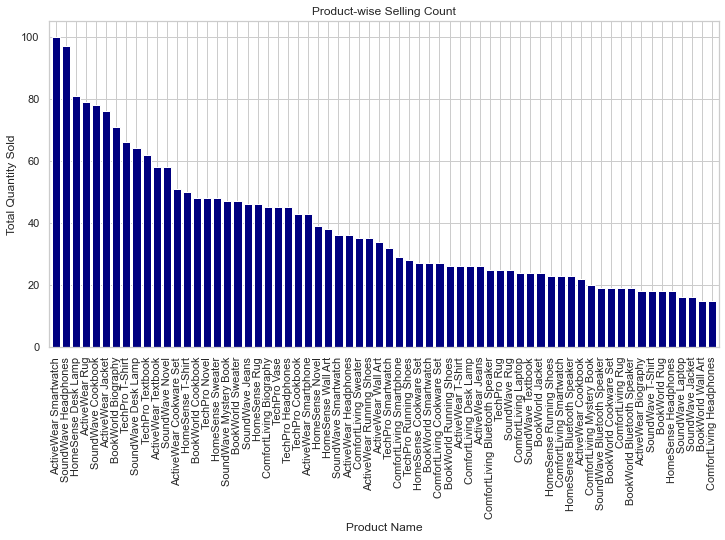


Product-wise Selling Count:
ProductName
ActiveWear Smartwatch       100
SoundWave Headphones         97
HomeSense Desk Lamp          81
ActiveWear Rug               79
SoundWave Cookbook           78
                           ... 
HomeSense Headphones         18
SoundWave Laptop             16
SoundWave Jacket             16
BookWorld Wall Art           15
ComfortLiving Headphones     15
Name: Quantity, Length: 66, dtype: int64


In [47]:
product_count = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
product_count.plot(kind='bar', color='navy', width=0.8)
plt.title('Product-wise Selling Count')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.show()

print("\nProduct-wise Selling Count:")
print(product_count)

### Step 9: Insights from Categories


### Most Purchased Categories

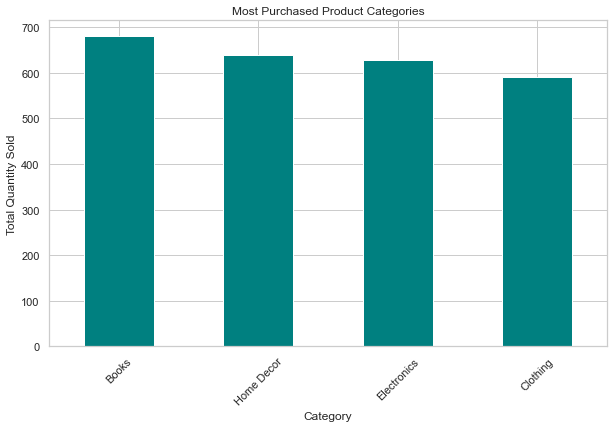


Most Purchased Product Categories:
Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


In [44]:
category_quantity = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_quantity.plot(kind='bar', color='teal')
plt.title('Most Purchased Product Categories')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

print("\nMost Purchased Product Categories:")
print(category_quantity)


### Revenue by Product Category

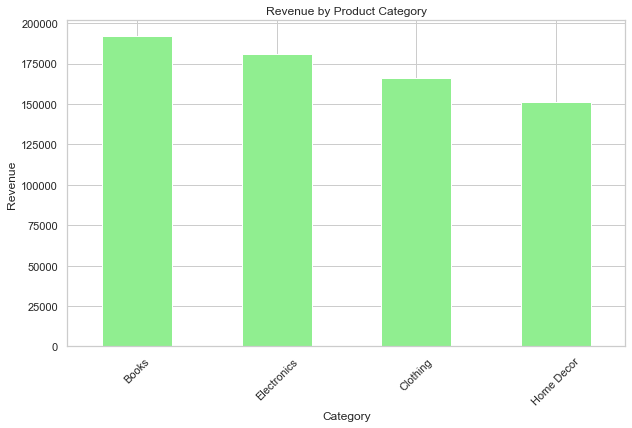

In [46]:
category_sales = merged_data.groupby('Category').agg({'Quantity': 'sum', 'TotalValue': 'sum'}).sort_values(by='TotalValue', ascending=False)

plt.figure(figsize=(10, 6))
category_sales['TotalValue'].plot(kind='bar', color='lightgreen')
plt.title('Revenue by Product Category')
plt.ylabel('Revenue')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


### Step 10: Customer Lifetime Value (CLV) Analysis

In [40]:

customer_lifetime_value = merged_data.groupby('CustomerID').agg({'TotalValue': 'sum'}).sort_values(by='TotalValue', ascending=False)

print("\nTop 10 Customers by Lifetime Value:")
print(customer_lifetime_value.head(10))

# Step 11: Correlation Analysis
plt.figure(figsize=(10, 6))
corr = merged_data[['Price_x', 'Quantity', 'TotalValue']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Top 10 Customers by Lifetime Value:
            TotalValue
CustomerID            
C0141         10673.87
C0054          8040.39
C0065          7663.70
C0156          7634.45
C0082          7572.91
C0188          7111.32
C0059          7073.28
C0028          6819.57
C0099          6715.72
C0165          6708.10


### Step 11: Correlation Analysis


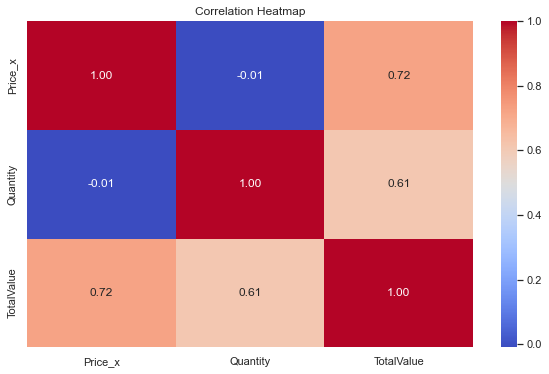

In [41]:
plt.figure(figsize=(10, 6))
corr = merged_data[['Price_x', 'Quantity', 'TotalValue']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [48]:
total_revenue = merged_data['TotalValue'].sum()
print(f"Total Revenue Generated: ${total_revenue:.2f}")


Total Revenue Generated: $689995.56


In [49]:
total_quantity_sold = merged_data['Quantity'].sum()
print(f"Total Quantity Sold: {total_quantity_sold} units")


Total Quantity Sold: 2537 units
